In [2]:
import pandas as pd

ret = pd.read_csv("data.tsv" , delimiter="\t").set_axis(labels=["movie_id", "average_rating", "number of ratings"], axis=1)

ret[500:]

,movie_id,average_rating,number of ratings
500,tt0000809,6.2,62
501,tt0000815,4.6,66
502,tt0000816,4.7,124
503,tt0000817,4.1,18
504,tt0000819,5.2,67
...,...,...,...
1256801,tt9916690,6.5,6
1256802,tt9916720,5.2,248
1256803,tt9916730,8.4,6
1256804,tt9916766,6.8,21


In [3]:
ratings_KV = pd.DataFrame()
ratings_KV["rating_key"] = ret["average_rating"].round().astype(int)
ratings_KV["movie_id_value"] = ret["movie_id"]

ratings_KV[ratings_KV["rating_key"] == 6][380:]

,rating_key,movie_id_value
1150,6,tt0002678
1156,6,tt0002736
1160,6,tt0002753
1162,6,tt0002759
1164,6,tt0002767
...,...,...
1256786,6,tt9916406
1256795,6,tt9916576
1256799,6,tt9916670
1256800,6,tt9916682


In [4]:
results = pd.read_csv("spark_results.csv", index_col=0)

results.sort_values(by="P_value", ascending=False, inplace=True)

results

,P_value,job1_time,job2 kind,job2_time,job3_time,multipositive_counter,multipositive_rate,num_cores_per_executor,num_executors
3,1.000000e-01,8.266,base,22.702,7.849,774845.0,6.165187e-01,4.0,12.0
4,1.000000e-01,5.413,aggregate_by_key,3.317,7.523,774845.0,6.165187e-01,4.0,12.0
5,1.000000e-01,5.884,group_by_key,2.445,8.012,774845.0,6.165187e-01,4.0,12.0
6,1.000000e-02,5.396,base,42.488,8.619,109907.0,8.744939e-02,4.0,12.0
7,1.000000e-02,5.345,aggregate_by_key,3.661,8.331,109907.0,8.744939e-02,4.0,12.0
8,1.000000e-02,5.169,group_by_key,2.812,8.799,109907.0,8.744939e-02,4.0,12.0
11,1.000000e-03,4.977,group_by_key,3.406,8.820,11331.0,9.015704e-03,4.0,12.0
9,1.000000e-03,5.628,base,69.689,8.815,11331.0,9.015704e-03,4.0,12.0
10,1.000000e-03,5.440,aggregate_by_key,3.999,9.768,11331.0,9.015704e-03,4.0,12.0
12,1.000000e-04,5.071,base,85.575,9.588,1165.0,9.269522e-04,4.0,12.0


In [5]:
results.sort_values(by=["job2 kind", "P_value"], ascending=False)

,P_value,job1_time,job2 kind,job2_time,job3_time,multipositive_counter,multipositive_rate,num_cores_per_executor,num_executors
5,1.000000e-01,5.884,group_by_key,2.445,8.012,774845.0,6.165187e-01,4.0,12.0
8,1.000000e-02,5.169,group_by_key,2.812,8.799,109907.0,8.744939e-02,4.0,12.0
11,1.000000e-03,4.977,group_by_key,3.406,8.820,11331.0,9.015704e-03,4.0,12.0
14,1.000000e-04,4.758,group_by_key,4.243,10.198,1165.0,9.269522e-04,4.0,12.0
17,1.000000e-05,5.332,group_by_key,4.631,10.083,114.0,9.070605e-05,4.0,12.0
2,1.000000e-06,5.411,group_by_key,5.508,10.418,8.0,6.365337e-06,4.0,12.0
21,1.000000e-07,5.371,group_by_key,5.928,10.719,1.0,7.956671e-07,4.0,12.0
3,1.000000e-01,8.266,base,22.702,7.849,774845.0,6.165187e-01,4.0,12.0
6,1.000000e-02,5.396,base,42.488,8.619,109907.0,8.744939e-02,4.0,12.0
9,1.000000e-03,5.628,base,69.689,8.815,11331.0,9.015704e-03,4.0,12.0


c:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

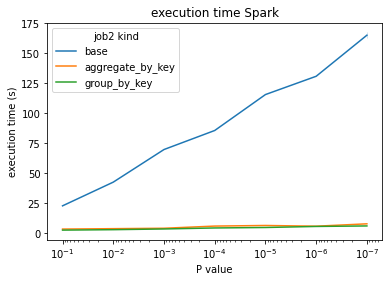

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.lineplot(results["P_value"], results["job2_time"], hue=results["job2 kind"])

ax = plt.gca()

ax.set_xscale('log')

ax.invert_xaxis()

ax.set_title("execution time Spark")

ax.set_xlabel("P value")

ax.set_ylabel("execution time (s)")

plt.plot()

In [7]:
import math

def getM(n, p) -> int:
    return int(-(n * math.log(p))/(math.log(2)**2))


def getK(m, n) -> int:
    return int((m/n) * math.log(2))

N_pairs = [(8, 349048), (6, 223904), (7, 377578), (5, 103731), (10, 16957), (4, 45072), (9, 112605), (3, 18576), (2, 6752), (1, 2584)]

N = [
    2584,
    6752,
    18576,
    45072,
    103731,
    223904,
    377578,
    349048,
    112605,
    16957
]

K = [0] * 10

M = [0] * 10

df_m_k = pd.DataFrame(columns=["rating", "P", "n",  "k", "m"])

for p in [0.1, 0.01, 0.001, 0.0001, 0.00001,0.000001]:
    for k, n in enumerate(N):
        M[k] = getM(n, p)
        K[k] = getK(M[k], n)
        row = {
            "rating"    : k + 1,
            "n"         : n,
            "P"         : p,
            "k"         : K[k],
            "m"         : M[k]
        }
        df_m_k = df_m_k.append(row, ignore_index=True)

df_m_k


C:\Users\giaco\AppData\Local\Temp\ipykernel_8412\4107268051.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_8412\4107268051.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_8412\4107268051.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\Users\giaco\AppData\Local\Temp\ipykernel_8412\4107268051.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m_k = df_m_k.append(row, ignore_index=True)
C:\U

,rating,P,n,k,m
0,1.0,0.1,2584.0,3.0,12383.0
1,2.0,0.1,6752.0,3.0,32359.0
2,3.0,0.1,18576.0,3.0,89026.0
3,4.0,0.1,45072.0,3.0,216008.0
4,5.0,0.1,103731.0,3.0,497133.0
5,6.0,0.1,223904.0,3.0,1073066.0
6,7.0,0.1,377578.0,3.0,1809553.0
7,8.0,0.1,349048.0,3.0,1672822.0
8,9.0,0.1,112605.0,3.0,539662.0
9,10.0,0.1,16957.0,3.0,81266.0


Index(['rating', 'P', 'n', 'k', 'm'], dtype='object')


c:\Python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


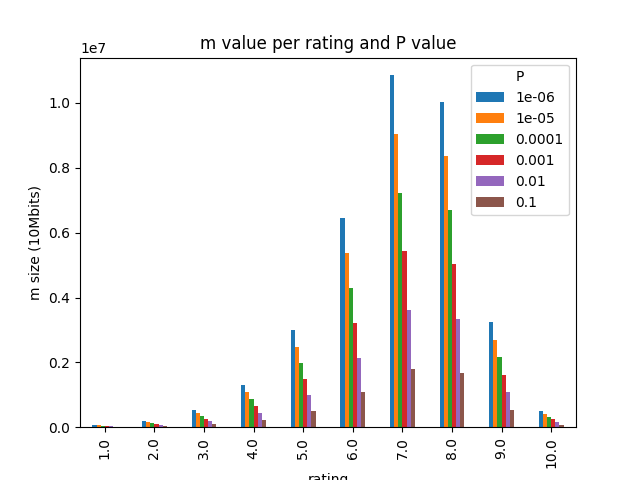

In [8]:
print( df_m_k.columns)
tmp = df_m_k.drop(["n", "k"], axis=1).sort_values("P", ascending=False)

%matplotlib ipympl

#https://stackoverflow.com/questions/47796264/how-to-create-a-grouped-bar-plot
ax = tmp.pivot("rating", "P", "m").plot(kind='bar')

ax.set_title("m value per rating and P value")

ax.set_ylabel("m size (10Mbits)")


plt.show()

# plot grouped bar chart
#tmp.plot(x='rating',
#        kind='bar',
#        stacked=False,
#        title='Grouped Bar Graph with dataframe', color=tmp["P"])


[]

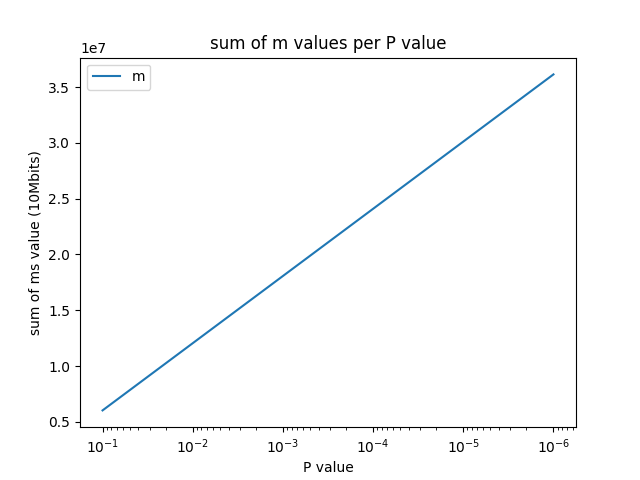

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df_total_m_per_P = df_m_k.groupby("P").sum().drop(["k", "n", "rating"], axis=1)


df_total_m_per_P.plot()
#print(df_total_m_per_P.columns)
#plt.plot(results["P_value"], results["job2_time"], hue=results["job2 kind"])
#print(df_total_m_per_P, df_total_m_per_P.columns)
#plt.plot(df_total_m_per_P)  # ["P"], df_total_m_per_P["m"]

ax = plt.gca()

ax.set_xscale('log')

ax.invert_xaxis()

ax.set_title("sum of m values per P value")

ax.set_xlabel("P value")

ax.set_ylabel("sum of ms value (10Mbits)")

plt.plot()


Index(['P_value', 'job1_time', 'job2 kind', 'job2_time', 'job3_time',
       'multipositive_counter', 'multipositive_rate', 'num_cores_per_executor',
       'num_executors'],
      dtype='object')


[]

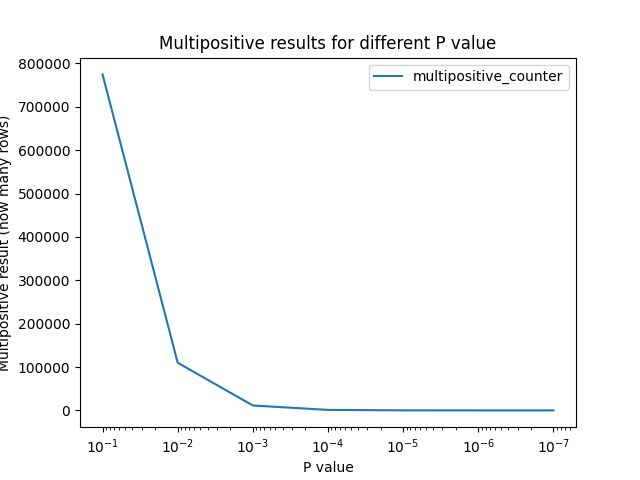

In [10]:
print(results.columns)

res_tmp = results[["P_value", "multipositive_counter", "multipositive_rate"]]

res_tmp = res_tmp.drop_duplicates().set_index("P_value").drop("multipositive_rate", axis=1)

res_tmp.plot()

ax = plt.gca()

ax.set_xscale('log')

ax.invert_xaxis()

ax.set_title("Multipositive results for different P value")

ax.set_xlabel("P value")

ax.set_ylabel("Multipositive result (how many rows)")

plt.plot()
